In [33]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
from typing import Optional
import time
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

# Load the data into DataFrames (replace 'sheet1.csv' and 'sheet2.csv' with your actual file paths)
df1 = pd.read_csv("CustomerData1.csv")
df2 = pd.read_csv("CustomerData2.csv")


In [3]:
df1.head()

,name,email,age,gender,total_purchases,total_spent,customer_since
0,Katie Smith,katie.smith@hotmail.com,40,Male,38,5423.18,2017
1,David Smith,david.smith@hotmail.com,40,Female,54,8292.73,2019
2,Sarah Jones,sarah.jones@yahoo.com,36,Female,90,8270.97,2014
3,Chris Moore,chris.moore@yahoo.com,22,Male,22,4891.91,2019
4,Mike Wilson,mike.wilson@company.com,30,Female,27,1276.33,2017


In [4]:
df2.head()

,customer_name,customer_email,age_group,sex,purchases_count,amount_spent,member_since
0,Katie Smith,katie.smith@company.com,36-45,Male,46,3311.53,2013
1,David Smith,david.smith@yahoo.com,66-70,Female,1,9397.53,2020
2,Sarah Jones,sarah.jones@hotmail.com,26-35,Male,95,7235.82,2018
3,Chris Moore,chris.moore@outlook.com,18-25,Female,3,9330.18,2019
4,Mike Wilson,mike.wilson@hotmail.com,18-25,Female,24,7540.85,2010


In [34]:
# Standardize column names
df1.columns = df1.columns.str.strip().str.replace(" ", "_").str.lower()

# Highlight missing values
missing_df1 = df1.isnull().sum()

# Fill or drop missing values as needed (example: fill age with median)
df1['age'].fillna(df1['age'].median(), inplace=True)

# Convert data types
df1['customer_since'] = pd.to_datetime(df1['customer_since'], errors='coerce')

In [35]:
# Step 1: Standardize column names
df2.columns = df2.columns.str.strip().str.lower().str.replace(" ", "_")
print("\nStandardized Column Names:\n", df2.columns)

# Step 2: Check and correct data types
# Ensure purchases_count and amount_spent are numeric
df2['purchases_count'] = pd.to_numeric(df2['purchases_count'], errors='coerce')
df2['amount_spent'] = pd.to_numeric(df2['amount_spent'], errors='coerce')

# Ensure member_since is treated as an integer (or datetime if analyzing date trends)
df2['member_since'] = pd.to_numeric(df2['member_since'], errors='coerce', downcast='integer')

# Step 3: Handle missing values (if any)
print("\nMissing Values Before Cleaning:\n", df2.isnull().sum())
# Example: Fill missing values for demonstration (if they existed)
df2.fillna({
    'purchases_count': df2['purchases_count'].median(),
    'amount_spent': df2['amount_spent'].median(),
    'member_since': df2['member_since'].mode()[0]
}, inplace=True)

# Step 4: Validate and Clean Categorical Data (e.g., 'sex' column)
df2['sex'] = df2['sex'].str.title()  # Standardize to 'Male' and 'Female'

# Step 5: Verify Categorical Columns for Consistency
# Ensure only standard values in 'age_group' and 'sex' columns
print("\nUnique values in 'age_group':", df2['age_group'].unique())
print("Unique values in 'sex':", df2['sex'].unique())

df2.head()


Standardized Column Names:
 Index(['customer_name', 'customer_email', 'age_group', 'sex',
       'purchases_count', 'amount_spent', 'member_since'],
      dtype='object')

Missing Values Before Cleaning:
 customer_name      0
customer_email     0
age_group          0
sex                0
purchases_count    0
amount_spent       0
member_since       0
dtype: int64

Unique values in 'age_group': ['36-45' '66-70' '26-35' '18-25' '56-65' '46-55']
Unique values in 'sex': ['Male' 'Female']


,customer_name,customer_email,age_group,sex,purchases_count,amount_spent,member_since
0,Katie Smith,katie.smith@company.com,36-45,Male,46,3311.53,2013
1,David Smith,david.smith@yahoo.com,66-70,Female,1,9397.53,2020
2,Sarah Jones,sarah.jones@hotmail.com,26-35,Male,95,7235.82,2018
3,Chris Moore,chris.moore@outlook.com,18-25,Female,3,9330.18,2019
4,Mike Wilson,mike.wilson@hotmail.com,18-25,Female,24,7540.85,2010


In [36]:
import sqlite3
import pandas as pd

# Initialize SQLite in-memory database
conn = sqlite3.connect(':memory:')
df1.to_sql('sheet1', conn, index=False, if_exists='replace')
df2.to_sql('sheet2', conn, index=False, if_exists='replace')

# SQL Query: Inner Join
# Change 's2.email' to the actual column name in sheet2 containing email addresses
# Assuming the column in df2 is named 'customer_email', change to:
query = """
SELECT s1.*
FROM sheet1 AS s1
INNER JOIN sheet2 AS s2
ON s1.email = s2.customer_email
"""
matched_customers = pd.read_sql(query, conn)

# SQL Query: Customers with No Purchases in Last Year
query_no_purchase_last_year = """
SELECT *
FROM sheet1
WHERE strftime('%Y', 'now') - strftime('%Y', customer_since) > 1
"""
inactive_customers = pd.read_sql(query_no_purchase_last_year, conn)

In [38]:
# Create a segmented view
conn.execute("""
CREATE VIEW segmented_customers AS
SELECT *,
       CASE
           WHEN total_spent >= 10000 THEN 'High Spender'
           WHEN total_spent >= 5000 THEN 'Medium Spender'
           ELSE 'Low Spender'
       END AS spending_segment
FROM sheet1;
""")
segmented_customers = pd.read_sql("SELECT * FROM segmented_customers", conn)


In [40]:
# Summary Statistics
summary_stats = df1.describe()

In [41]:
numeric_feature = df1.select_dtypes(include=[np.number])

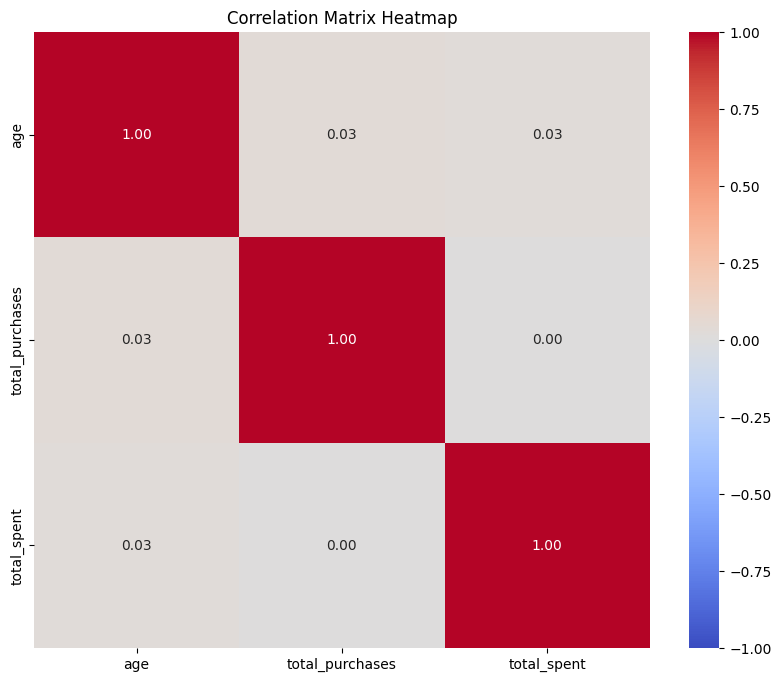

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample correlation matrix for demonstration
correlation_matrix = numeric_feature.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [47]:
import time
import pandas as pd

# Define the Customer class with the code you provided
class Customer:
    def __init__(self, customer_id: int, total_spent: float, total_purchases: int):
        self.customer_id = customer_id
        self.total_spent = total_spent
        self.total_purchases = total_purchases

    @staticmethod
    def timing_decorator(func):
        def wrapper(*args, **kwargs):
            start_time = time.time()
            result = func(*args, **kwargs)
            end_time = time.time()
            print(f"Execution time: {end_time - start_time:.2f} seconds")
            return result
        return wrapper

    @timing_decorator
    def calculate_clv(self):
        clv = self.total_spent * 0.1  # Placeholder CLV formula
        return clv

    def segment_customer(self) -> str:
        if self.total_spent >= 10000:
            return 'High Value'
        elif self.total_spent >= 5000:
            return 'Medium Value'
        else:
            return 'Low Value'

    @staticmethod
    def generator(data):
        for _, record in data.iterrows():
            yield record

# Step 1: Create sample data
data = {
    'customer_id': [1, 2, 3],
    'total_spent': [12000, 5500, 3000],
    'total_purchases': [40, 20, 10]
}
df = pd.DataFrame(data)

# Step 2: Instantiate a Customer object and test the methods
# Testing the first customer in the data
first_customer_data = df.iloc[0]
customer = Customer(
    customer_id=first_customer_data['customer_id'],
    total_spent=first_customer_data['total_spent'],
    total_purchases=first_customer_data['total_purchases']
)

# Calculate CLV and print the result
print("Customer CLV:", customer.calculate_clv())

# Segment the customer and print the result
print("Customer Segment:", customer.segment_customer())

# Step 3: Use the generator to iterate through all customer records in the DataFrame
print("\nIterating over all customer records:")
for record in Customer.generator(df):
    print(record)


Execution time: 0.00 seconds
Customer CLV: 1200.0
Customer Segment: High Value

Iterating over all customer records:
customer_id            1
total_spent        12000
total_purchases       40
Name: 0, dtype: int64
customer_id           2
total_spent        5500
total_purchases      20
Name: 1, dtype: int64
customer_id           3
total_spent        3000
total_purchases      10
Name: 2, dtype: int64


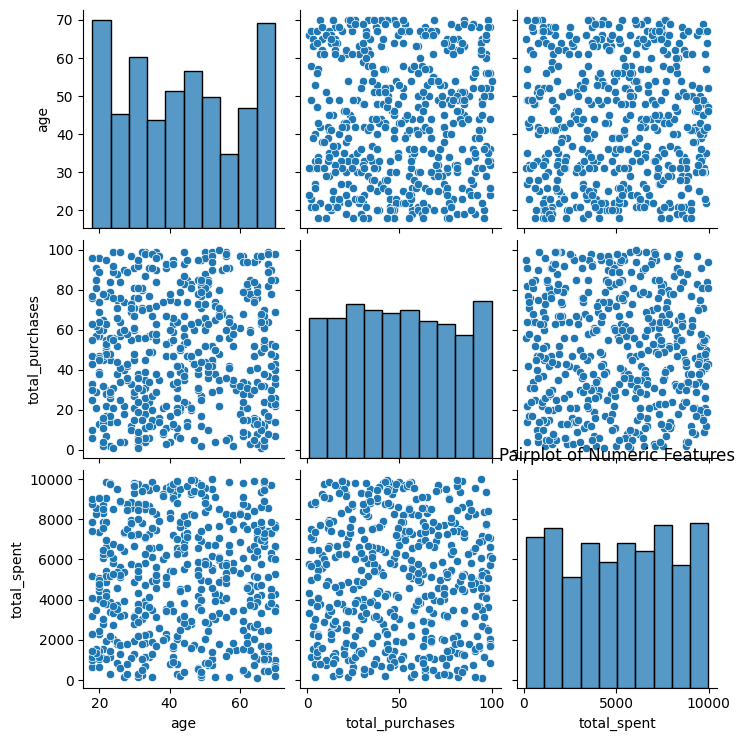

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot (Scatterplot Matrix)
sns.pairplot(numeric_feature)
plt.title("Pairplot of Numeric Features")
plt.show()

In [28]:
# Generator function to process large datasets
def customer_generator(data):
    for _, row in data.iterrows():
        yield row

# Example usage
for customer in customer_generator(df1):
    print(customer)

name                                 Katie Smith
email                    katie.smith@hotmail.com
age                                           40
gender                                      Male
total_purchases                               38
total_spent                              5423.18
customer_since     1970-01-01 00:00:00.000002017
Name: 0, dtype: object
name                                 David Smith
email                    david.smith@hotmail.com
age                                           40
gender                                    Female
total_purchases                               54
total_spent                              8292.73
customer_since     1970-01-01 00:00:00.000002019
Name: 1, dtype: object
name                                 Sarah Jones
email                      sarah.jones@yahoo.com
age                                           36
gender                                    Female
total_purchases                               90
total_spent            